<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Deep Learning and Neuronal Networks: Final Assignment</font></h1>


## Import the required libraries


In [1]:
#suppres warnings

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [ ]:
#!mamba install -y openpyxl

## Importing the Dataset


We'll use a beans dataset, which contains data about numerous types of beans, to do classification using a neural network model. This dataset contains six different types of beans' numerical characteristics, measured on a continuous scale. 

In [23]:
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### Attribute information

Area (A): The area of a bean zone and the number of pixels within its boundaries.

Perimeter (P): Bean circumference is defined as the length of its border.

Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

Aspect ratio (K): Defines the relationship between L and l.

Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

Roundness (R): Calculated with the following formula: (4piA)/(P^2)

Compactness (CO): Measures the roundness of an object: Ed/L

ShapeFactor1 (SF1)

ShapeFactor2 (SF2)

ShapeFactor3 (SF3)

ShapeFactor4 (SF4)

Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

# 1. About the Data


In upcoming section we'll perform basic exploratory data analysis.

In [24]:
# Number of rows and columns
print(data.shape)

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

(13611, 17)
['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object


In [25]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [26]:
#checking for duplicates

duplicate = data[data.duplicated()]
duplicate   #68 duplicates

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,63408,1005.966,412.551649,196.337705,2.101235,0.879494,64200,284.136539,0.798791,0.987664,0.787385,0.688730,0.006506,0.000903,0.474348,0.996718,HOROZ
7278,63882,1004.206,411.263403,198.765453,2.069089,0.875452,64663,285.196579,0.754705,0.987922,0.796054,0.693465,0.006438,0.000918,0.480893,0.995010,HOROZ
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ


We can observe that our dataset contains mostly numerical data formatted as float and one categorical variable identifying the class or type of beans. There are 68 duplicate observations that we decide to delete because doing so won't have an impact on the large dataset. 

In [27]:
#remove duplicates

data = data.drop_duplicates()
data = data.reset_index(drop=True)

Now we will explore distribution of beans by type.

In [28]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [29]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

Since the class is unevenly distributed and unbalanced, we have to perform stratified splitting.

In [30]:
data.isnull().sum() #no null values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

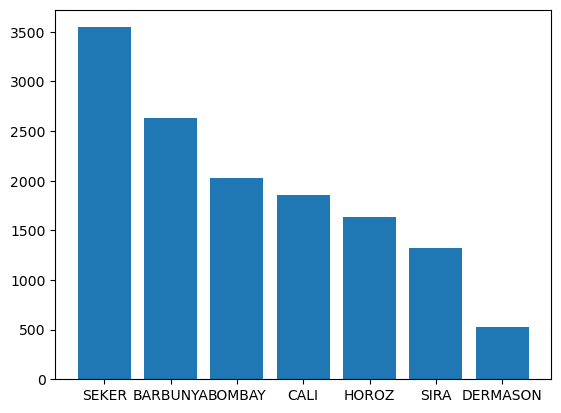

In [31]:
plt.bar(data['Class'].unique(),data['Class'].value_counts())
plt.show()

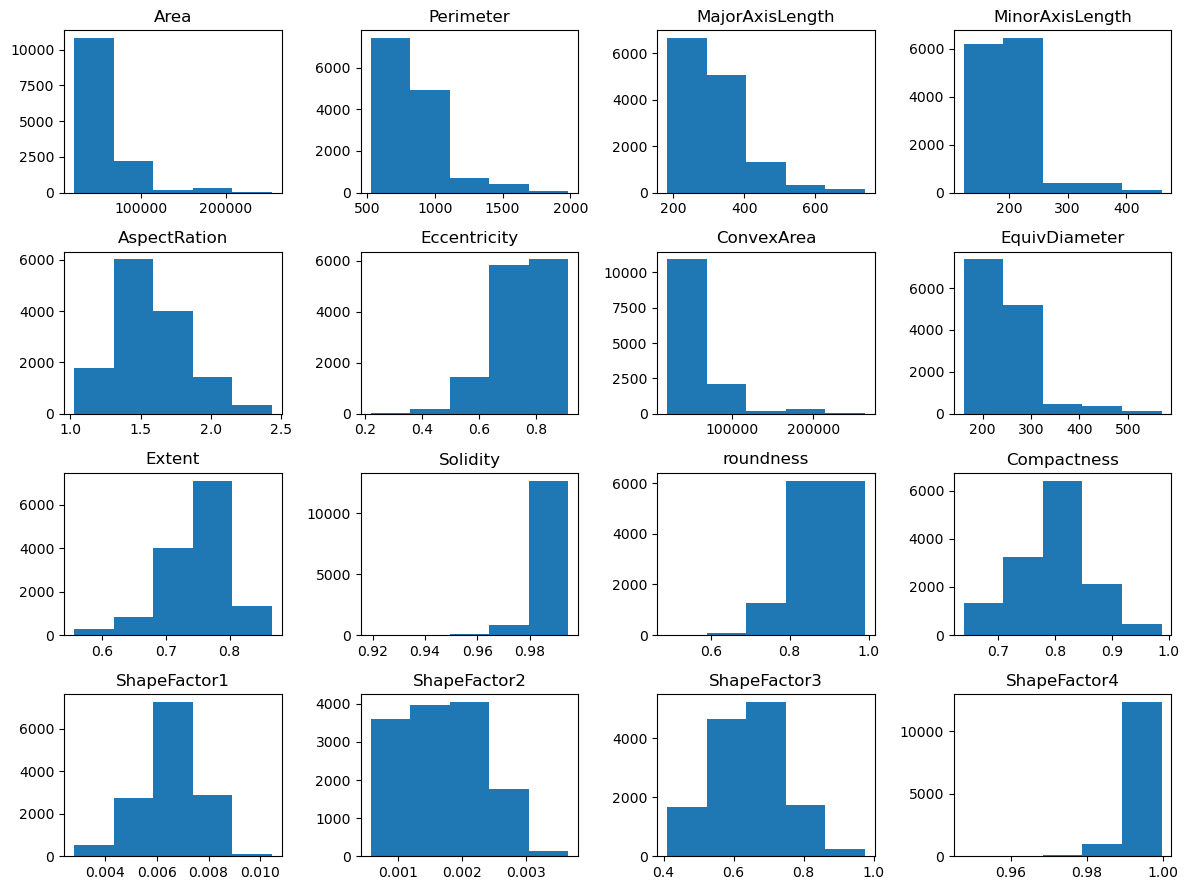

In [32]:
#distribution of numerical variables

numerical_columns = data.select_dtypes(include=['int64','float64']).columns

# Set up the grid layout
num_rows = 4
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 9))

# Iterate over the categorical columns and plot histograms
for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    
    # Create a bar plot
    axes[row, col].hist(data[column], bins=5)
    axes[row, col].set_title(column)

# Remove empty subplots if the number of categorical columns is less than 3x4
if len(numerical_columns) < num_rows * num_cols:
    for i in range(len(numerical_columns), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()  

When we look at the histograms, we can see that most numerical variables are not normally distributed, so we must normalize them using the appropriate technique.

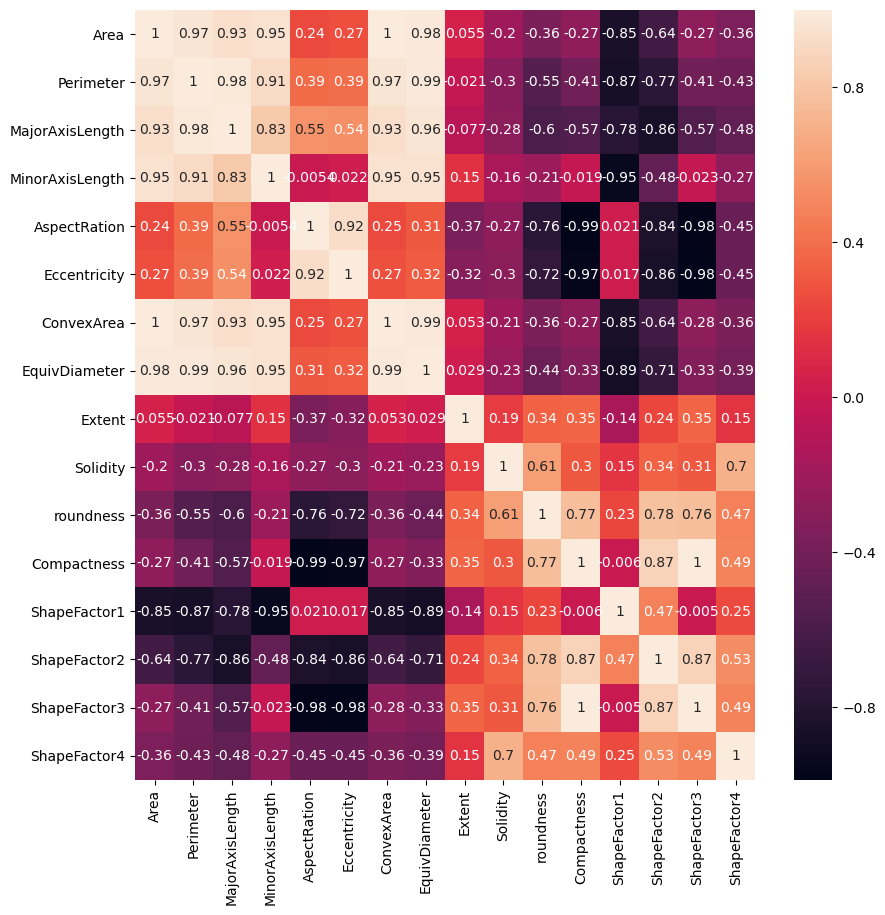

In [33]:
#correlation between variables

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

plt.show()

Before feeding our data into deep learning algorithms, it is important to perform scaling and standardization. Scaling ensures that all features are on a similar scale, while standardization transforms the data to have zero mean and unit variance. 

In [34]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scaling the raw input features
X = scaler.fit_transform(data[numerical_columns])
data[numerical_columns] = X

In [35]:
#one-hot encoding

one_hot_encode_cols = data.dtypes[data.dtypes == np.object] 
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  

data = pd.get_dummies(data, columns=one_hot_encode_cols, drop_first=True)

In [36]:
one_hot_cols = ['Class_BOMBAY','Class_CALI','Class_DERMASON','Class_HOROZ',
               'Class_SEKER','Class_SIRA']

In [37]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,0.034053,0.058574,0.044262,0.152142,0.122612,0.477797,0.033107,0.070804,0.671024,0.922824,...,0.593432,0.833049,0.750996,0.980620,0,0,0,0,1,0
1,0.035500,0.077557,0.030479,0.178337,0.051577,0.278472,0.034991,0.073577,0.735504,0.871514,...,0.547447,0.967315,0.884987,0.974979,0,0,0,0,1,0
2,0.038259,0.068035,0.052633,0.158190,0.131521,0.496448,0.037126,0.078816,0.716671,0.932141,...,0.582016,0.800942,0.736200,0.987196,0,0,0,0,1,0
3,0.040940,0.082942,0.048548,0.177691,0.091623,0.403864,0.041389,0.083854,0.731365,0.761614,...,0.552408,0.854744,0.799846,0.893675,0,0,0,0,1,0
4,0.041504,0.065313,0.032862,0.200679,0.025565,0.165680,0.040123,0.084906,0.700538,0.949832,...,0.510741,1.000000,0.941770,0.989116,0,0,0,0,1,0


In [38]:
#Stratified spliting 

one_hot_cols = ['Class_BOMBAY', 'Class_CALI', 'Class_DERMASON', 'Class_HOROZ', 'Class_SEKER', 'Class_SIRA']

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data, data.loc[:,one_hot_cols]))

# Create the dataframes
X_train = data.loc[train_idx, :]
y_train = data.loc[train_idx, one_hot_cols]

X_test  = data.loc[test_idx, :]
y_test  = data.loc[test_idx, one_hot_cols]

In [40]:
# Convert X_train, X_test, y_train, y_test to NumPy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Since the categorical columns in our dataset are unevenly distributed and unbalanced, we should use stratified splitting. This helps us make sure that the training and testing datasets have a fair representation of each category. By doing this, we can avoid biases and train our models on a more accurate and balanced dataset.

# 2. Objectives


The objective of our analysis is to develop an efficient deep learning model that effectively captures patterns and relationships in the dataset of beans. The model should demonstrate high accuracy in classifying beans correctly while ensuring computational efficiency. By achieving this objective, we aim to provide a reliable and scalable solution for bean classification that can be applied in real-world scenarios.

In pursuit of our objective, we employ a feed-forward neural network (FNN) architecture with specific configurations. The FNN utilizes the Rectified Linear Unit (ReLU) activation function to introduce non-linearity and enhance the model's ability to capture complex relationships within the bean dataset. Additionally, we incorporate L2 regularization to mitigate overfitting and encourage the model to have smaller weights, thereby promoting generalization.

By adhering to these configurations and training the model accordingly, we aim to develop an FNN that achieves accurate and efficient classification of the different types of beans present in the dataset.

# 3. FNN Model


In [76]:
num_features = 22
num_neurons = 8

# Create the FNN model
model = Sequential()
model.add(Dense(num_neurons, activation='relu', input_shape=(num_features,),
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(num_neurons, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 184       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 54        
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


In [77]:
#Fit the model
fnn_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model 
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Train on 9480 samples, validate on 4063 samples
Epoch 1/10
9480/9480 [==============================] - 1s 133us/sample - loss: 0.9798 - acc: 0.6404 - val_loss: 0.3593 - val_acc: 0.9023
Epoch 2/10
9480/9480 [==============================] - 1s 87us/sample - loss: 0.1780 - acc: 0.9024 - val_loss: 0.1433 - val_acc: 0.9025
Epoch 3/10
9480/9480 [==============================] - 1s 89us/sample - loss: 0.1944 - acc: 0.9084 - val_loss: 0.2670 - val_acc: 0.9402
Epoch 4/10
9480/9480 [==============================] - 1s 86us/sample - loss: 0.3679 - acc: 0.9184 - val_loss: 0.4852 - val_acc: 0.9077
Epoch 5/10
9480/9480 [==============================] - 1s 89us/sample - loss: 0.6178 - acc: 0.9245 - val_loss: 0.7663 - val_acc: 0.9038
Epoch 6/10
9480/9480 [==============================] - 1s 89us/sample - loss: 0.9242 - acc: 0.9285 - val_loss: 1.1019 - val_acc: 0.9606
Epoch 7/10
9480/9480 [==============================] - 1s 84us/sample - loss: 1.2721 - acc: 0.9304 - val_loss: 1.4852 - val_acc:

In [79]:
#Fit the model (batch_size = 24)
fnn_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=24)

# Evaluate the model 
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Train on 9480 samples, validate on 4063 samples
Epoch 1/10
9480/9480 [==============================] - 1s 111us/sample - loss: 9.5315 - acc: 0.8431 - val_loss: 9.4950 - val_acc: 0.9035
Epoch 2/10
9480/9480 [==============================] - 1s 110us/sample - loss: 11.7501 - acc: 0.7501 - val_loss: 14.7189 - val_acc: 0.3443
Epoch 3/10
9480/9480 [==============================] - 1s 117us/sample - loss: 11.3158 - acc: 0.8489 - val_loss: 11.4297 - val_acc: 0.9023
Epoch 4/10
9480/9480 [==============================] - 1s 114us/sample - loss: 13.7933 - acc: 0.7525 - val_loss: 12.4410 - val_acc: 0.9023
Epoch 5/10
9480/9480 [==============================] - 1s 112us/sample - loss: 15.4391 - acc: 0.7550 - val_loss: 15.1128 - val_acc: 0.5511
Epoch 6/10
9480/9480 [==============================] - 1s 114us/sample - loss: 15.2088 - acc: 0.7897 - val_loss: 16.7016 - val_acc: 0.7654
Epoch 7/10
9480/9480 [==============================] - 1s 113us/sample - loss: 17.3641 - acc: 0.6943 - val_loss: 

In [80]:
#Fit the model (batch_size = 40)
fnn_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=40)

# Evaluate the model 
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Train on 9480 samples, validate on 4063 samples
Epoch 1/10
9480/9480 [==============================] - 1s 82us/sample - loss: 19.8368 - acc: 0.8807 - val_loss: 21.6835 - val_acc: 0.4558
Epoch 2/10
9480/9480 [==============================] - 1s 76us/sample - loss: 24.3092 - acc: 0.6475 - val_loss: 21.7918 - val_acc: 0.8639
Epoch 3/10
9480/9480 [==============================] - 1s 78us/sample - loss: 21.0821 - acc: 0.9085 - val_loss: 23.6024 - val_acc: 0.8639
Epoch 4/10
9480/9480 [==============================] - 1s 72us/sample - loss: 25.8446 - acc: 0.6284 - val_loss: 22.2686 - val_acc: 0.9035
Epoch 5/10
9480/9480 [==============================] - 1s 75us/sample - loss: 23.2770 - acc: 0.8646 - val_loss: 24.7036 - val_acc: 0.7632
Epoch 6/10
9480/9480 [==============================] - 1s 69us/sample - loss: 28.1254 - acc: 0.6182 - val_loss: 24.9469 - val_acc: 0.8636
Epoch 7/10
9480/9480 [==============================] - 1s 70us/sample - loss: 25.3919 - acc: 0.8152 - val_loss: 24.84

In [81]:
#Fit the model (epochs = 5)
fnn_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Evaluate the model 
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Train on 9480 samples, validate on 4063 samples
Epoch 1/5
9480/9480 [==============================] - 1s 94us/sample - loss: 32.2260 - acc: 0.6230 - val_loss: 36.6990 - val_acc: 0.5466
Epoch 2/5
9480/9480 [==============================] - 1s 88us/sample - loss: 33.1392 - acc: 0.6391 - val_loss: 31.9786 - val_acc: 0.7435
Epoch 3/5
9480/9480 [==============================] - 1s 85us/sample - loss: 32.6682 - acc: 0.7639 - val_loss: 31.2061 - val_acc: 0.8639
Epoch 4/5
9480/9480 [==============================] - 1s 87us/sample - loss: 37.2498 - acc: 0.6140 - val_loss: 38.0925 - val_acc: 0.4652
Epoch 5/5
4063/4063 [==============================] - 0s 29us/sample - loss: 43.5344 - acc: 0.7266
Test Loss: 43.5344
Test Accuracy: 0.7266


In [82]:
#Fit the model (epochs = 15)
fnn_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)

# Evaluate the model 
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Train on 9480 samples, validate on 4063 samples
Epoch 1/15
9480/9480 [==============================] - 1s 87us/sample - loss: 40.3113 - acc: 0.6265 - val_loss: 34.7934 - val_acc: 0.8639
Epoch 2/15
9480/9480 [==============================] - 1s 84us/sample - loss: 38.6917 - acc: 0.7147 - val_loss: 44.3203 - val_acc: 0.5031
Epoch 3/15
9480/9480 [==============================] - 1s 87us/sample - loss: 41.1818 - acc: 0.6502 - val_loss: 47.5384 - val_acc: 0.5489
Epoch 4/15
9480/9480 [==============================] - 1s 88us/sample - loss: 41.9787 - acc: 0.6904 - val_loss: 56.0915 - val_acc: 0.3005
Epoch 5/15
9480/9480 [==============================] - 1s 87us/sample - loss: 46.0936 - acc: 0.6350 - val_loss: 40.7963 - val_acc: 0.7032
Epoch 6/15
9480/9480 [==============================] - 1s 89us/sample - loss: 49.4930 - acc: 0.5649 - val_loss: 48.7805 - val_acc: 0.4379
Epoch 7/15
9480/9480 [==============================] - 1s 84us/sample - loss: 45.9027 - acc: 0.6842 - val_loss: 46.27

# 4. Insights and key findings


After experimenting with different values, we discovered that the optimal configuration for achieving the best performance of our model is with 10 epochs and a batch size of 32. It is important to note that both increasing and decreasing these parameters resulted in higher loss values and lower test accuracy.

The best model, trained with 10 epochs and a batch size of 32 had a loss of 2.85 and an accuracy of 95.91 on the test dataset. These metrics demonstrate the model's ability to effectively capture patterns and relationships in the data, resulting in accurate classification of the different types of beans.

By fine-tuning the values of epochs and batch size, we were able to strike a balance between capturing sufficient information from the data during training (epochs) and optimizing the computational efficiency and stability of the learning process (batch size). This finding suggests that a moderate number of epochs and an appropriate batch size are crucial for achieving the best performance on our specific bean classification task.

These results validate the effectiveness of our chosen configuration and serve as a basis for future model optimization and deployment in real-world applications involving bean classification.

In [4]:
table = {
    'epochs': [10, 10, 10, 5, 15],
    'batch size': [32, 24, 40, 32, 32],
    'test loss': [2.85, 19.69, 35.54, 43.53, 63.78],
    'test accuracy': [95.91, 86.39, 28.62, 72.66, 40.73]
}

table = pd.DataFrame(table)

print(table)

   epochs  batch size  test loss  test accuracy
0      10          32       2.85          95.91
1      10          24      19.69          86.39
2      10          40      35.54          28.62
3       5          32      43.53          72.66
4      15          32      63.78          40.73


# 5. Next Steps


Some next steps we can consider:

* Model Evaluation and Analysis: Dive deeper into the performance metrics of trained model. Evaluate additional metrics such as precision, recall, and F1 score to gain a more comprehensive understanding of the model's performance. Analyze any patterns or trends in misclassifications and explore potential sources of error.

* Hyperparameter Tuning: Experiment with different combinations of hyperparameters to further optimize model's performance. Explore variations in learning rate, regularization strength, number of layers, and layer sizes. Utilize techniques such as grid search or random search to efficiently search the hyperparameter space.

* Error Analysis and Iteration: Continuously analyze and learn from the model's errors. Identify challenging cases or specific classes that are consistently misclassified and explore ways to address them. Iterate on model, dataset, and techniques based on the insights gained from the error analysis.



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
